# TASK 3: CLASSIFICATION | OVERSAMPLING

In [91]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

Read the .csv file containing the data. The first line contains the list of attributes. The data is assigned to a Pandas dataframe.

In [92]:
df = pd.read_csv(r"csv/seismic_new.csv", skipinitialspace=True)

In [93]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,class,log_genergy,log_gpuls,log_gdenergy,log_gdpuls,log_energy
0,0.0,0.0,0.0,15180,48,-72,-72,0.0,0,0,0,0,0,0,0,9.627734,3.871201,3.218876,3.218876,0.000000
1,0.0,0.0,0.0,14720,33,-70,-79,0.0,1,0,1,0,0,2000,0,9.596962,3.496508,3.295837,2.890372,7.601402
2,0.0,0.0,0.0,8050,30,-81,-78,0.0,0,0,0,0,0,0,0,8.993427,3.401197,2.772589,2.944439,0.000000
3,0.0,0.0,0.0,28820,171,-23,40,0.0,1,0,1,0,0,3000,0,10.268825,5.141664,4.304065,4.919981,8.006701
4,0.0,0.0,0.0,12640,57,-63,-52,0.0,0,0,0,0,0,0,0,9.444622,4.043051,3.526361,3.806662,0.000000


In [94]:
df.shape

(2578, 20)

In [95]:
sns.set_theme(style="darkgrid")

### Feature preprocessing

Rimozione attributi non necessari

In [96]:
to_drop = ['log_genergy', 'log_gpuls', 'log_gdenergy', 'log_gdpuls', 'log_energy', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'seismic', 'seismoacoustic', 'hazard']
df.drop(to_drop, axis=1, inplace=True)

In [97]:
df.head()

,shift,genergy,gpuls,gdenergy,gdpuls,nbumps,energy,class
0,0.0,15180,48,-72,-72,0,0,0
1,0.0,14720,33,-70,-79,1,2000,0
2,0.0,8050,30,-81,-78,0,0,0
3,0.0,28820,171,-23,40,1,3000,0
4,0.0,12640,57,-63,-52,0,0,0


### Importing libraries

In [98]:
###### Lecture Pipeline ######
# you can/have to modify the order for your project,
# e.g. hyperparameter tuning before evaluating a decision tree

# Hold-out
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier
# Optional: RandomForest
from sklearn.ensemble import RandomForestClassifier

##### Decision Tree Visualization ###
from sklearn import tree # export_graphviz() method
import pydotplus # viz stuff
from IPython.display import Image # viz stuff
####################################

######## Evaluation #######
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay, plot_precision_recall_curve
# Optional: baseline comparison
from sklearn.dummy import DummyClassifier
###########################

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation
from sklearn.model_selection import cross_val_score

### X = attributes, Y =  target value

Suddivisione training set e test set

In [99]:
# Selezione attributi in X e target variable in y
attributes = [col for col in df.columns if col != 'class']
X = df[attributes].values
y = df['class']

In [100]:
# hold-out
# Test set pari al 30% del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
len(df), X_train.shape[0], X_test.shape[0]

# test_size-> specify the proportion of the split eg 0.3, 30% of the dataset belongs to the test set
# stratify -> to mantain the balance of the target variable
# random_state -> to specify that we want a good splitting, avoiding the randomness of the splitting

# X_train-> feature space of the training set
# X_test ->feature space of the test set
# y_train -> target variables of the training set
# y_test ->target variables of the test set

(2578, 1804, 774)

In [101]:
# composizione test set
y_test.value_counts()

0    723
1     51
Name: class, dtype: int64

In [102]:
# composizione training set
y_train.value_counts()

0    1685
1     119
Name: class, dtype: int64

### Oversampling

https://imbalanced-learn.org/stable/over_sampling.html#random-over-sampler

In [103]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from collections import Counter
from collections import defaultdict

#### RandomOverSampler

In [104]:
# One way is to generate new samples in the classes which are under-represented (in our case class = 1).
# The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples.

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1685, 1: 1685})


Viene generato un nuovo training set con elementi con classe 0 e con classe 1 di ugual numero (1685)

### DecisionTreeClassifier

In [105]:
# Inizializzazione classifier

clf = DecisionTreeClassifier()
clf.fit(X_res, y_res)

DecisionTreeClassifier()

### Hyperparameters Tuning

In [106]:
# Utilizzo hyperparameters tuning per il DecisionTree
# Si utilizza il RandomizedSearchCV

param_list = {"criterion": ['gini', 'entropy'], # impurity measurement 
              'max_depth': [None] + [2, 3, 4, 6, 8, 10, 12], # cut of the leaf
             'min_samples_split': [2, 3, 4, 5, 8, 10, 12, 15, 18, 20, 25], # min n. of samples required in a node to split the node
             'min_samples_leaf': [1, 2, 3, 4, 5, 10, 12, 15, 20, 22, 25] # min n. of samples required to be in both left and right 
                                                                         # child of a parent node to split that parent node
             }

grid_search = RandomizedSearchCV(clf, param_distributions=param_list, scoring='recall', n_iter=100, random_state=42)
grid_search.fit(X_res, y_res)

res = grid_search.cv_results_

In [107]:
# Togliere "#" per visualizzare il report del RandomizedSearch

#res

In [108]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3,
                       min_samples_split=5)

In [109]:
# Generazione del report dei migliori 3 risultati

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [110]:
report(res, n_top=3)

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': None, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.993 (std: 0.006)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 3, 'max_depth': None, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.987 (std: 0.018)
Parameters: {'min_samples_split': 18, 'min_samples_leaf': 1, 'max_depth': 12, 'criterion': 'entropy'}



In [111]:
# DecisionTreeClassifier e parametri definitivi

clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=None ,
                             min_samples_split=5,
                             min_samples_leaf=3,
                            )

# Alcuni risultati della ROC curve (vedi dopo):
# 5, 20 = 0.68
# 10, 5 = 0.64
# 8, 2 = 0.58


clf.fit(X_res, y_res)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3,
                       min_samples_split=5)

In [112]:
# Dizionario con le feature più importanti
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(attributes)}
imp_dict

{'shift': 0.008740415637414737,
 'genergy': 0.258131992996559,
 'gpuls': 0.13934812978820332,
 'gdenergy': 0.16765389099921116,
 'gdpuls': 0.16347831499222085,
 'nbumps': 0.03764980149294965,
 'energy': 0.22499745409344127}

In [113]:
# Dizionario ordinato
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'genergy': 0.258131992996559,
 'energy': 0.22499745409344127,
 'gdenergy': 0.16765389099921116,
 'gdpuls': 0.16347831499222085,
 'gpuls': 0.13934812978820332,
 'nbumps': 0.03764980149294965,
 'shift': 0.008740415637414737}

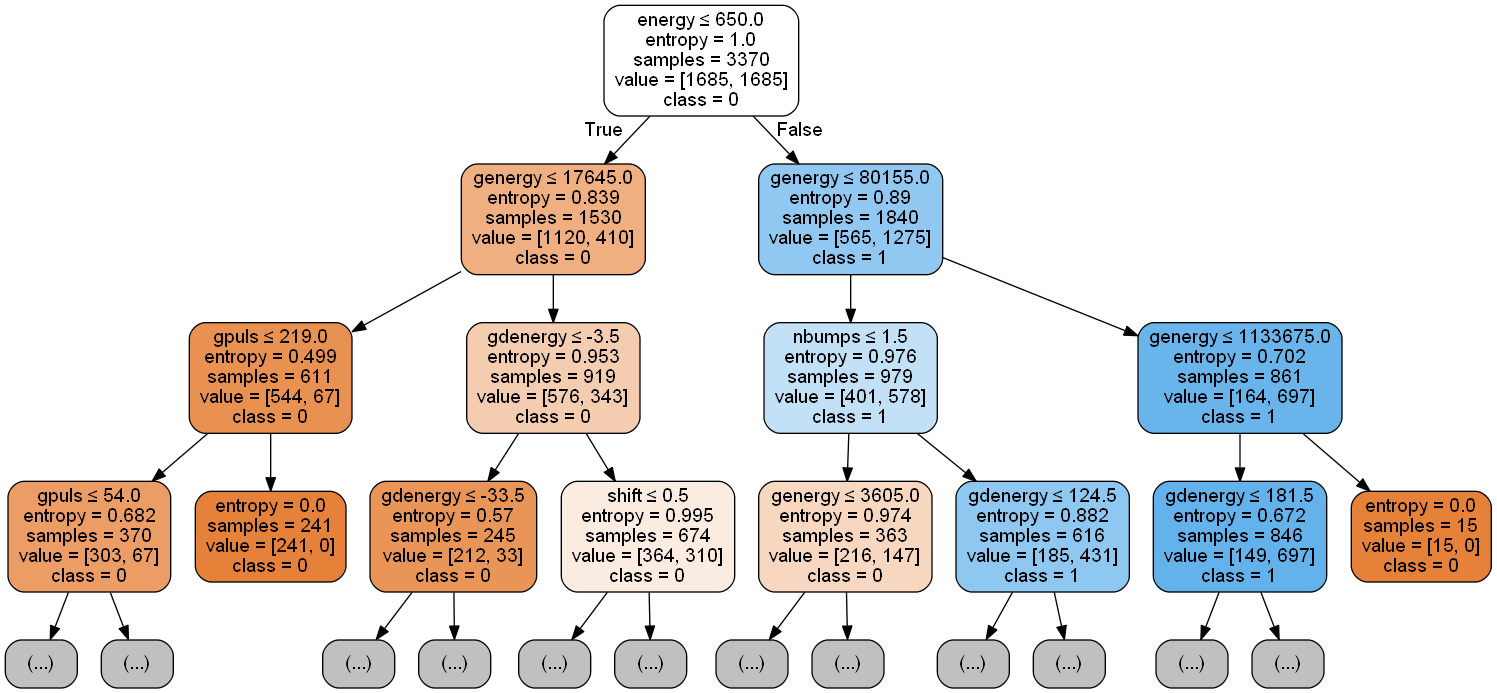

In [114]:
# Visualizzazione albero del DecisionTree | max depth = 3

dot_data = tree.export_graphviz (clf, # Name of the instances of the DT
                                out_file=None,
                                feature_names=attributes, # Name of the variables
                                class_names=[str(v) for v in clf.classes_], # Name of the classes in target variable
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Evaluation of the DT (graph above): <br>
On the first node we can observe:
* 1 parameter: variable that we chose to split the node, in the first node it's based on a categorical attribute. eg Sex <= 0.5-> if sex == 0 (female), you split the rows in the left child, if sex == 1 (male), you split the rows on the right child.
* 2 parameter: impurity measurement, eg 0.473-> node is impure,  high value
* 3 parameter: number of Samples within the node
* 4 parameter: Number of samples according to the target variable, eg so 384 is the number of values associated to the first value of the target variable, 239 is the number of samples associated to the second value of the target variable. We'll rename the first value (384) as a negative class and the other (239) as a positive class, since a common way to deal with the target variable's value in a binary classification is to have a negative class (associated to the label 0) and a positive class (associated to the label 1). NB. Useful for the evaluation.
* 5 parameter: Indicates the most frequent class within the node

### Evaluation

In [115]:
# Predict the target variable according to the rules found above (on training set)
y_pred = clf.predict(X_res)

In [116]:
# List of classes predicted by algorithm
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [117]:
# Original values of the class
y_train.values[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [118]:
# Evaluation of the prediction: comparing the prediction with the original values
print('Accuracy', accuracy_score(y_res, y_pred))
print('F1', f1_score(y_res, y_pred, average=None)) # Average-> obtain values both for neg (sx) and pos (dx) class

Accuracy 0.9928783382789318
F1 [0.99282726 0.9929287 ]


In [119]:
# Summary of prediction
print( classification_report(y_res, y_pred) )

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1685
           1       0.99      1.00      0.99      1685

    accuracy                           0.99      3370
   macro avg       0.99      0.99      0.99      3370
weighted avg       0.99      0.99      0.99      3370



#### Confusion Matrix Training set

In [120]:
cf = confusion_matrix(y_res, y_pred, labels=[1,0])
cf

array([[1685,    0],
       [  24, 1661]], dtype=int64)

In [121]:
# TP, FN, FP, TN
cf[0][0], cf[0][1], cf[1][0], cf[1][1]

(1685, 0, 24, 1661)

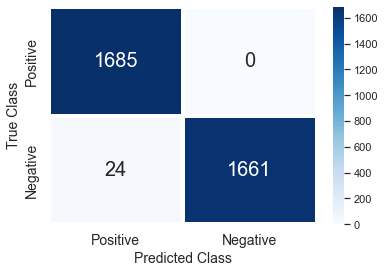

In [122]:
ax = sns.heatmap(cf, annot=True, fmt="d", annot_kws={"size": 20}, linewidths=4, cmap="Blues")
ax.set_xticklabels(['Positive','Negative'], fontsize=14)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_yticklabels(['Positive','Negative'], fontsize=14)
ax.set_ylabel('True Class', fontsize=14)

plt.show()

In [123]:
cf = confusion_matrix(y_res, y_pred, labels=[1,0], normalize='all')
cf

array([[0.5       , 0.        ],
       [0.00712166, 0.49287834]])

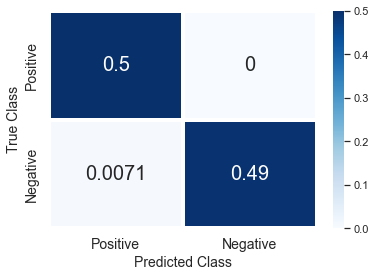

In [124]:
ax = sns.heatmap(cf, annot=True, annot_kws={"size": 20}, linewidths=4, cmap="Blues")
ax.set_xticklabels(['Positive','Negative'], fontsize=14)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_yticklabels(['Positive','Negative'], fontsize=14)
ax.set_ylabel('True Class', fontsize=14)

plt.show()

#### Check su test set | ROC Curve

In [125]:
# Predict the target variable according to the rules (on test set)
y_pred = clf.predict(X_test)

In [126]:
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [127]:
# Evaluation of the prediction: comparing the prediction with the original values
print('Accuracy', accuracy_score(y_test, y_pred))
print('F1', f1_score(y_test, y_pred, average=None)) # Average-> obtain values both for neg (sx) and pos (dx) class

Accuracy 0.9031007751937985
F1 [0.94816862 0.25742574]


In [128]:
# Summary of prediction
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       723
           1       0.26      0.25      0.26        51

    accuracy                           0.90       774
   macro avg       0.60      0.60      0.60       774
weighted avg       0.90      0.90      0.90       774



#### Confusion Matrix Test set

In [129]:
cf = confusion_matrix(y_test, y_pred, labels=[1,0])
cf

array([[ 13,  38],
       [ 37, 686]], dtype=int64)

In [130]:
# TP, FN, FP, TN
cf[0][0], cf[0][1], cf[1][0], cf[1][1]

(13, 38, 37, 686)

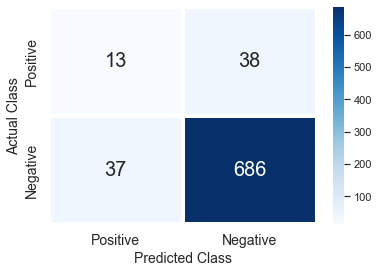

In [131]:
ax = sns.heatmap(cf, annot=True, fmt="d", annot_kws={"size": 20}, linewidths=4, cmap="Blues")
ax.set_xticklabels(['Positive','Negative'], fontsize=14)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_yticklabels(['Positive','Negative'], fontsize=14)
ax.set_ylabel('Actual Class', fontsize=14)

plt.show()

In [132]:
cf = confusion_matrix(y_test, y_pred, labels=[1,0], normalize='all')
cf

array([[0.01679587, 0.04909561],
       [0.04780362, 0.88630491]])

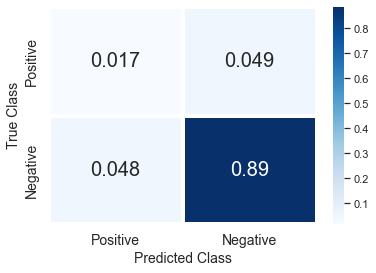

In [133]:
ax = sns.heatmap(cf, annot=True, annot_kws={"size": 20}, linewidths=4, cmap="Blues")
ax.set_xticklabels(['Positive','Negative'], fontsize=14)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_yticklabels(['Positive','Negative'], fontsize=14)
ax.set_ylabel('True Class', fontsize=14)

plt.show()

In [134]:
# Another way to predict: obtain probability instead of classes (useful to introduce the ROC curve)
# Prediction of the positive class
# Prediction the probability of a sample belong to the positive class
y_score = clf.predict_proba(X_test)
y_score[:10]

# Any prediction (rows) is a pair of values, where on the left we have the 
# probability to belong the negative class (eg 1) and on the right the prob to belong
# to the positive class (eg 0)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [135]:
# ROC curve
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

# Area under the curve
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6012122691400211


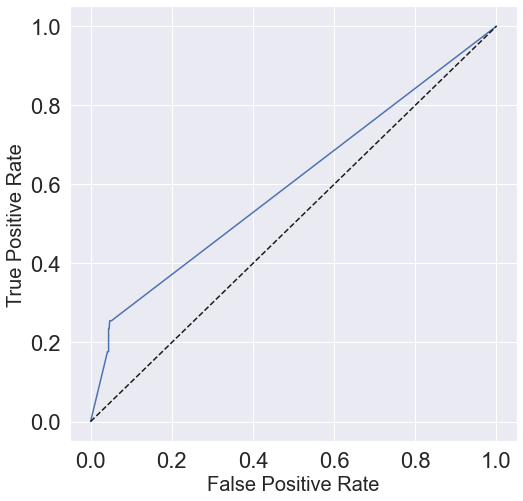

In [136]:
# Visualization of the ROC curve
plt.figure(figsize=(8,8))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

#### Precision-Recall curve

Utilizziamo la Precision-Recall curve poiché il nostro dataset è fortemente sbilanciato nella target variable

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [137]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [138]:
# Area under the curve

prc_auc = auc(recall, precision)
prc_auc

0.2498364109031868

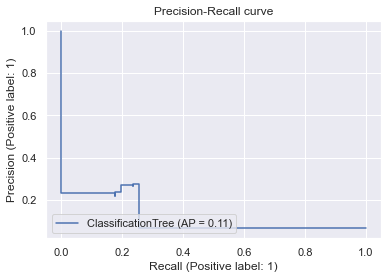

In [145]:
# Visualization of the Precision-Recall curve

y_score = clf.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="ClassificationTree")
_ = display.ax_.set_title("Precision-Recall curve")

## KNN

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
# Elaborazione KNN con k 48 (sqrt(number of training set))
# Calcolo Accuracy e F1

clf_KNN = KNeighborsClassifier(n_neighbors=48, weights="distance")
print("KNN with k =", + 48)
scores = cross_val_score(clf_KNN, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf_KNN, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

KNN with k = 48
Accuracy: 0.9317 (+/- 0.01)
F1-score: 0.4823 (+/- 0.00)


In [154]:
# Elaborazione KNN con k 48 (sqrt(number of training set))
# Calcolo Accuracy e F1

clf_KNN = KNeighborsClassifier(n_neighbors=48, weights="uniform")
print("KNN with k =", + 48)
scores = cross_val_score(clf_KNN, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf_KNN, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

KNN with k = 48
Accuracy: 0.9341 (+/- 0.00)
F1-score: 0.4830 (+/- 0.00)


## RandomForest

In [54]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [False, False]

In [55]:
# Create the param grid
param_grid = {'n_estimators': n_estimators, 
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [False, False]}


In [56]:
rf_Model = RandomForestClassifier()

#### GridSearch

In [57]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 2)

In [58]:
rf_Grid.fit(X_res, y_res)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'bootstrap': [False, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [59]:
# Best parameters for RandomForest generated by GridSearch

rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

#### RandomizedSearchCV

In [60]:
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 2)

In [61]:
rf_RandomGrid.fit(X_res, y_res)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'bootstrap': [False, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [62]:
# Best parameters for RandomForest generated by RandomizedSearch

rf_RandomGrid.best_params_

{'n_estimators': 17,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

#### Check Accuracy

In [63]:
print (f'Train Accuracy - : {rf_Grid.score(X_res,y_res):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.809
Test Accuracy - : 0.824


In [64]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_res,y_res):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.810
Test Accuracy - : 0.810


In [65]:
y_pred_rf = rf_RandomGrid.predict(X_test)

In [66]:
y_pred_rf[:20]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [67]:
y_score_rf = rf_RandomGrid.predict_proba(X_test)
y_score_rf[:10]

array([[0.72773609, 0.27226391],
       [0.35880004, 0.64119996],
       [0.83450071, 0.16549929],
       [0.52344908, 0.47655092],
       [0.84534327, 0.15465673],
       [0.89674596, 0.10325404],
       [0.67761598, 0.32238402],
       [0.38332003, 0.61667997],
       [0.85577735, 0.14422265],
       [0.71105473, 0.28894527]])

In [68]:
fpr, tpr, th = roc_curve(y_test, y_score_rf[:,1])

roc_auc_rf = auc(fpr, tpr)
print(roc_auc_rf)

0.7583190952729639


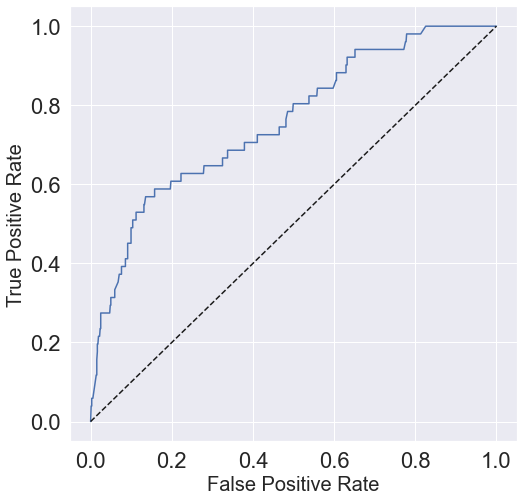

In [69]:
plt.figure(figsize=(8,8))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [70]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score_rf[:,1])

In [71]:
prc_auc_rf = auc(recall, precision)
prc_auc_rf

0.25644627361776345

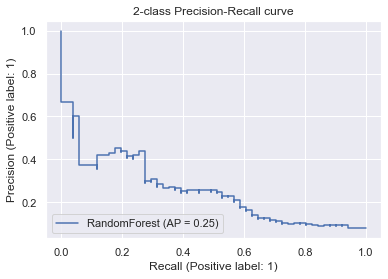

In [72]:
y_score_rf = rf_RandomGrid.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score_rf[:,1], name="RandomForest")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [73]:
best = []
best = rf_RandomGrid.best_params_
best

{'n_estimators': 17,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

In [74]:
rf_Model = RandomForestClassifier(bootstrap= False, 
                                  max_depth= 4, 
                                  max_features= 'auto', 
                                  min_samples_leaf= 1, 
                                  min_samples_split= 2, 
                                  n_estimators= 64)
rf_Model

RandomForestClassifier(bootstrap=False, max_depth=4, n_estimators=64)

In [75]:
rf_Model.fit(X_res, y_res)

RandomForestClassifier(bootstrap=False, max_depth=4, n_estimators=64)

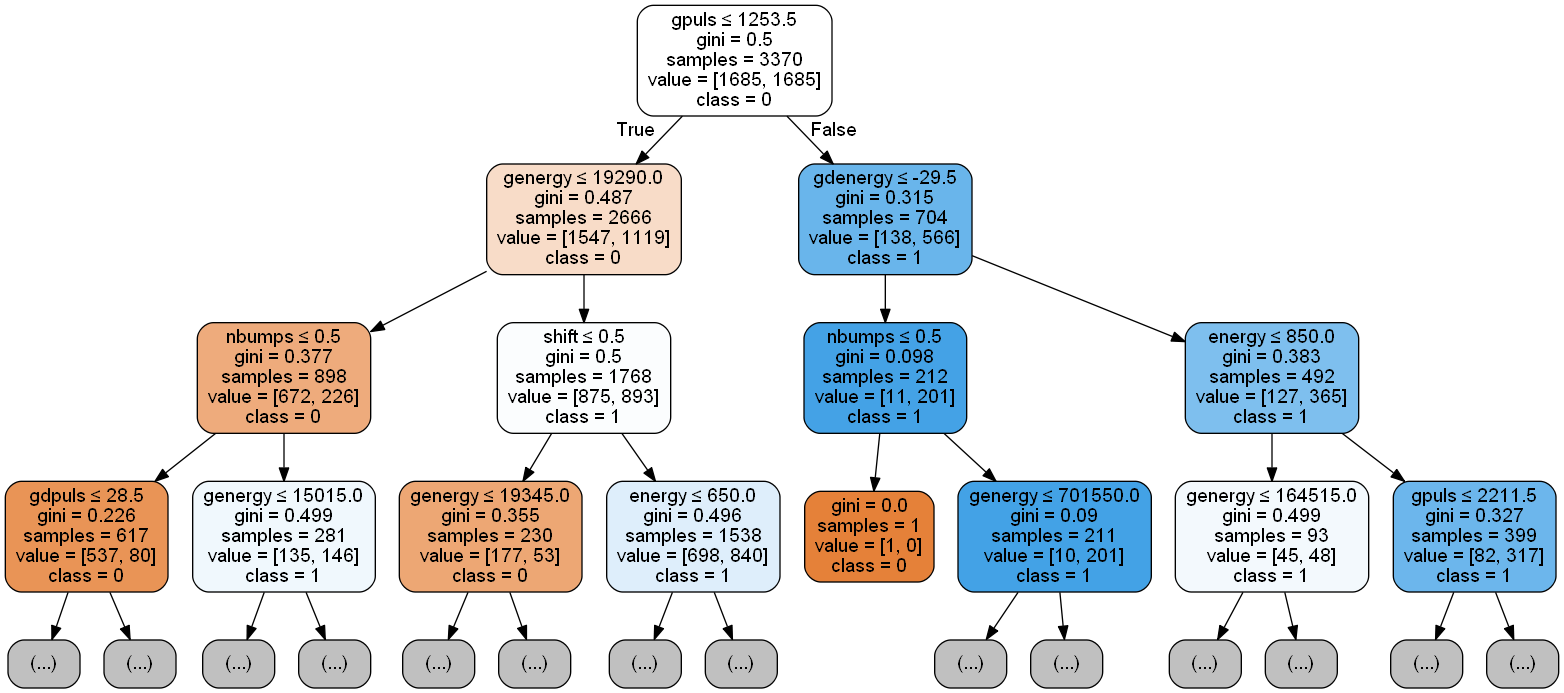

In [76]:
dot_data = tree.export_graphviz (rf_Model.estimators_[0], out_file=None,
                                feature_names=attributes,
                                class_names=[str(v) for v in rf_Model.classes_],
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())